# STC Jawwy

In [1]:
"""
Here we install libraries that are not installed by default 
Example:  pyslsb
Feel free to add any library you are planning to use.
"""
!pip install pyxlsb


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Import the required libraries 
"""
Please feel free to import any required libraries as per your need
"""
import pandas as pd     # provides high-performance, easy to use structures and data analysis tools
import pyxlsb           # Excel extention to read xlsb files (the input file)
import numpy as np      # provides fast mathematical computation on arrays and matrices

# Jawwy dataset
The dataset includes total watching hours for customers per day. 

You are required to work on predecting the forecast for the watching hours.

In [2]:
dataframe = pd.read_excel("stc- Jawwy TV Data Set_T2.xlsm", index_col=0)
# Please make a copy of dataset if you are going to work directly and make changes on the dataset
# you can use   df=dataframe.copy()


FileNotFoundError: [Errno 2] No such file or directory: 'stc- Jawwy TV Data Set_T2.xlsm'

In [7]:
# check the data shape
dataframe.shape

NameError: name 'dataframe' is not defined

In [8]:
# display the first 5 rows 
dataframe.head()

NameError: name 'dataframe' is not defined

In [ ]:
# describe the numeric values in the dataset
dataframe.describe()

,Total_watch_time_in_houres
count,86.000000
mean,780.817926
std,122.992002
min,562.124722
25%,707.709653
50%,763.181389
75%,840.985278
max,1123.551944


In [ ]:
# check if any column has null value in the dataset
dataframe.isnull().any()

date_                         False
Total_watch_time_in_houres    False
dtype: bool

In [ ]:
# we import Visualization libraries 
# you can ignore and use any other graphing libraries 
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
# Setting the date as index
dataframe.set_index('date_', inplace=True)

In [ ]:
# Display the dataframe after setting the date as index
dataframe.head()

,Total_watch_time_in_houres
date_,
2018-01-01,1123.551944
2018-01-02,1000.129722
2018-01-03,881.924444
2018-01-04,782.669444
2018-01-05,1051.939444


In [6]:
# show the dataframe
fig = px.line(dataframe,  y="Total_watch_time_in_houres")
fig.show()

NameError: name 'px' is not defined

In [7]:
# using the previous dataset build a prediction model to predict the expected watch time for the next two months
y = dataframe["Total_watch_time_in_houres"]
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

NameError: name 'dataframe' is not defined

In [ ]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [8]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=True,
                                            enforce_invertibility=False)
            
            results = mod.fit(disp=0)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

NameError: name 'pdq' is not defined

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False)
results = mod.fit(disp=0)
print(results.summary().tables[1])

/Users/mahmoud/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/Users/mahmoud/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7956      0.087     -9.121      0.000      -0.967      -0.625
ma.S.L12      -1.0000      0.158     -6.339      0.000      -1.309      -0.691
sigma2      1.002e+04   1.57e-05   6.36e+08      0.000       1e+04       1e+04


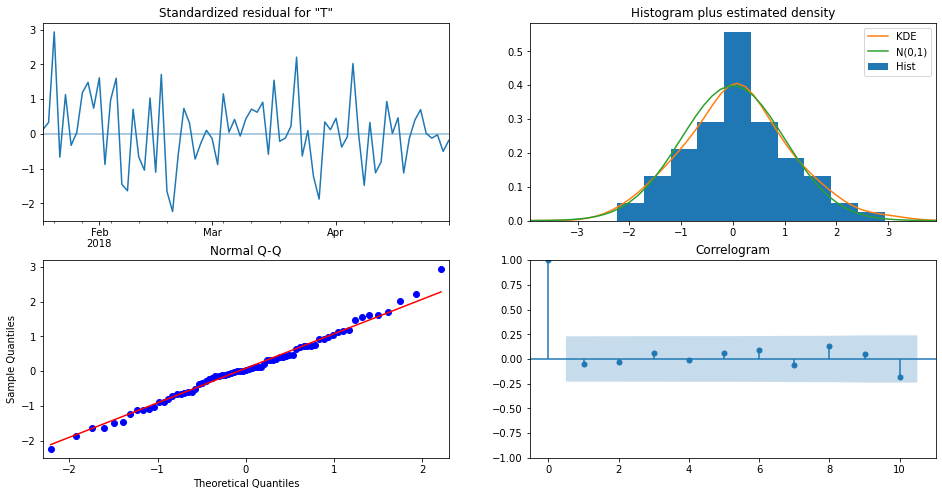

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [4]:
# show the Model out come agianst the actual data
pred = results.get_prediction(start=pd.to_datetime('2018-02-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = dataframe['Total_watch_time_in_houres'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('watched')
plt.legend()
plt.show()

NameError: name 'results' is not defined

In [5]:
# show forecasts 
pred_uc = results.get_forecast(steps=60)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Total_watch_time_in_houres')
plt.legend()
plt.show()

NameError: name 'results' is not defined